## Raincloud Plots (MLE)

**Purpose:**  Create raincloud plots for *all* multi-domain studies with **MLE calculations**

Author: Saurish Srivastava @ [Subjectivity Lab](subjectivity.sites.northeastern.edu)

In [ ]:
# install packages
!pip3 install numpy
!pip3 install pandas
!pip3 install seaborn
!pip3 install matplotlib
!pip3 install ptitprince

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ptitprince as pt

sns.set_context("talk")

In [2]:
def concatAllData(dataList, domainsList):
    """
    Concatenate all data into one central dataframe
    """
    groupData = pd.DataFrame()
    for i, dataName in enumerate(dataList):
        domains = [domain + '_mratio_log' for domain in domainsList[i]]
        data = pd.read_csv('../../exports/metrics_' + dataName + '.csv', usecols=domains)
        # get rid of _mratio suffix
        data.columns = data.columns.str.replace(r'_mratio_log', '')
        # add author prefix
        data = data.add_prefix(dataName.split('_')[0] + '_')
        # merge data with new dataset
        groupData = pd.concat([groupData, data], axis=1) 

    return(groupData)

In [3]:
fullData = concatAllData(dataList=['Arbuzova_unpub_3', 'Mazancieux_2018', 'Sadeghi_2017', 'Samaha_2016', 'Samaha_2017_exp3',
                   'Schmidt_2019', 'Skora_2016', 'Ye_2018'],
        domainsList=[['memory'], ['VP', 'SM', 'EM'], ['memory', 'perception'],
                ['percept_low', 'percept_high', 'wm_low', 'wm_high'], ['oriperc', 'contrast', 'oriwm'],
                ['memory', 'perception'], ['FM', 'IM', 'WM'], ['perception', 'memory']])

In [4]:
fullData = fullData.rename(columns={"Arbuzova_memory": "Arbuzova_M", "Mazancieux_VP": "Mazancieux_V_P",
                                    "Mazancieux_SM": "Mazancieux_S_M", "Mazancieux_EM": "Mazancieux_E_M",
                                    "Sadeghi_memory": "Sadeghi_M", "Sadeghi_perception": "Sadeghi_P",
                                    "Samaha_percept_low": "Samaha_Low_P", "Samaha_percept_high": "Samaha_High_P",
                                    "Samaha_wm_high": "Samaha_High_W_M", "Samaha_wm_low": "Samaha_Low_W_M",
                                    "Samaha_oriperc": "Samaha_Ori_P", "Samaha_contrast": "Samaha_C_P",
                                    "Samaha_oriwm": "Samaha_Ori_M", "Schmidt_memory": "Schmidt_M",
                                    "Schmidt_perception": "Schmidt_P", "Skora_FM": "Skora_F_M",
                                    "Skora_IM": "Skora_I_M", "Skora_WM": "Skora_W_M",
                                    "Ye_perception": "Ye_P", "Ye_memory": "Ye_M"})
# fullData = fullData.reindex(fullData.mean().sort_values(ascending=False).index, axis=1)

In [5]:
fullData

,Arbuzova_M,Mazancieux_V_P,Mazancieux_S_M,Mazancieux_E_M,Sadeghi_M,Sadeghi_P,Samaha_Low_P,Samaha_High_P,Samaha_Low_W_M,Samaha_High_W_M,Samaha_Ori_P,Samaha_C_P,Samaha_Ori_M,Schmidt_M,Schmidt_P,Skora_F_M,Skora_I_M,Skora_W_M,Ye_P,Ye_M
0,0.420587,-0.670336,0.534370,0.608803,0.233246,0.464740,-0.200517,0.325103,-1.166104,-2.464364,-1.101891,-0.577216,NaN,-2.201502,NaN,0.259446,0.066413,-0.878854,0.351329,0.336466
1,0.353641,-0.831151,-2.168646,-0.407627,0.468428,-0.178769,NaN,NaN,-0.191837,NaN,-1.162184,-0.380369,-0.338507,0.215353,0.959228,0.645281,-0.466620,-1.438540,0.346610,0.483225
2,0.191599,-0.631223,0.578821,0.865247,0.041679,-0.168203,0.536653,0.102335,-0.364856,-0.703207,-0.756692,-0.156586,-0.628726,NaN,-0.702363,0.043397,-0.327109,NaN,0.314042,0.774222
3,-0.074400,-0.282253,1.326675,0.531824,0.337913,-0.003030,-0.640598,-0.245191,-0.978067,NaN,-1.532946,NaN,NaN,-0.294523,-0.875117,0.193763,NaN,-0.666885,0.345077,0.548307
4,0.210556,-0.145906,-0.076946,0.170225,-0.678143,NaN,-0.349906,-0.249188,-2.313599,NaN,NaN,-1.713885,-1.625334,NaN,NaN,-0.046847,-0.269482,0.377280,0.332459,0.730573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,NaN,NaN,-0.178345,0.108045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,NaN,NaN,0.181393,-0.286373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,NaN,NaN,0.770449,1.015289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,NaN,-0.894398,-0.027484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
sns.set(style="whitegrid", font_scale=1.25)
def plotFullRaincloud(data):
    """
    Create raincloud plots with input = dataframe
    """
    data = pd.melt(data)
    
    # create raincloud plot
    
    colors = ['#0ABAF9' if ('_M' in y) else '#E5313D' for y in data['variable'].unique()]
    
    f, ax = plt.subplots(figsize=(30, 20))
    
    ax = pt.half_violinplot(x='value', y='variable', data=data, palette=colors,
                           bw=0.2, cut=0, scale='area', width=0.6, inner=None, orient='h')
    ax.axvline(0, ls='--', color='orange')
    ax = sns.stripplot(x='value', y='variable', data=data, palette=colors, edgecolor='white', size=3, jitter=1,
                      zorder=0, orient='h')
    ax = sns.boxplot(x='value', y='variable', data=data, color='black', width=.15, zorder=10, showcaps=True,
                     boxprops={'facecolor': 'none', 'zorder': 10}, showfliers=True,
                     whiskerprops={'linewidth': 2, 'zorder': 10}, saturation=1, orient='h')
    ax.title.set_text('mle')

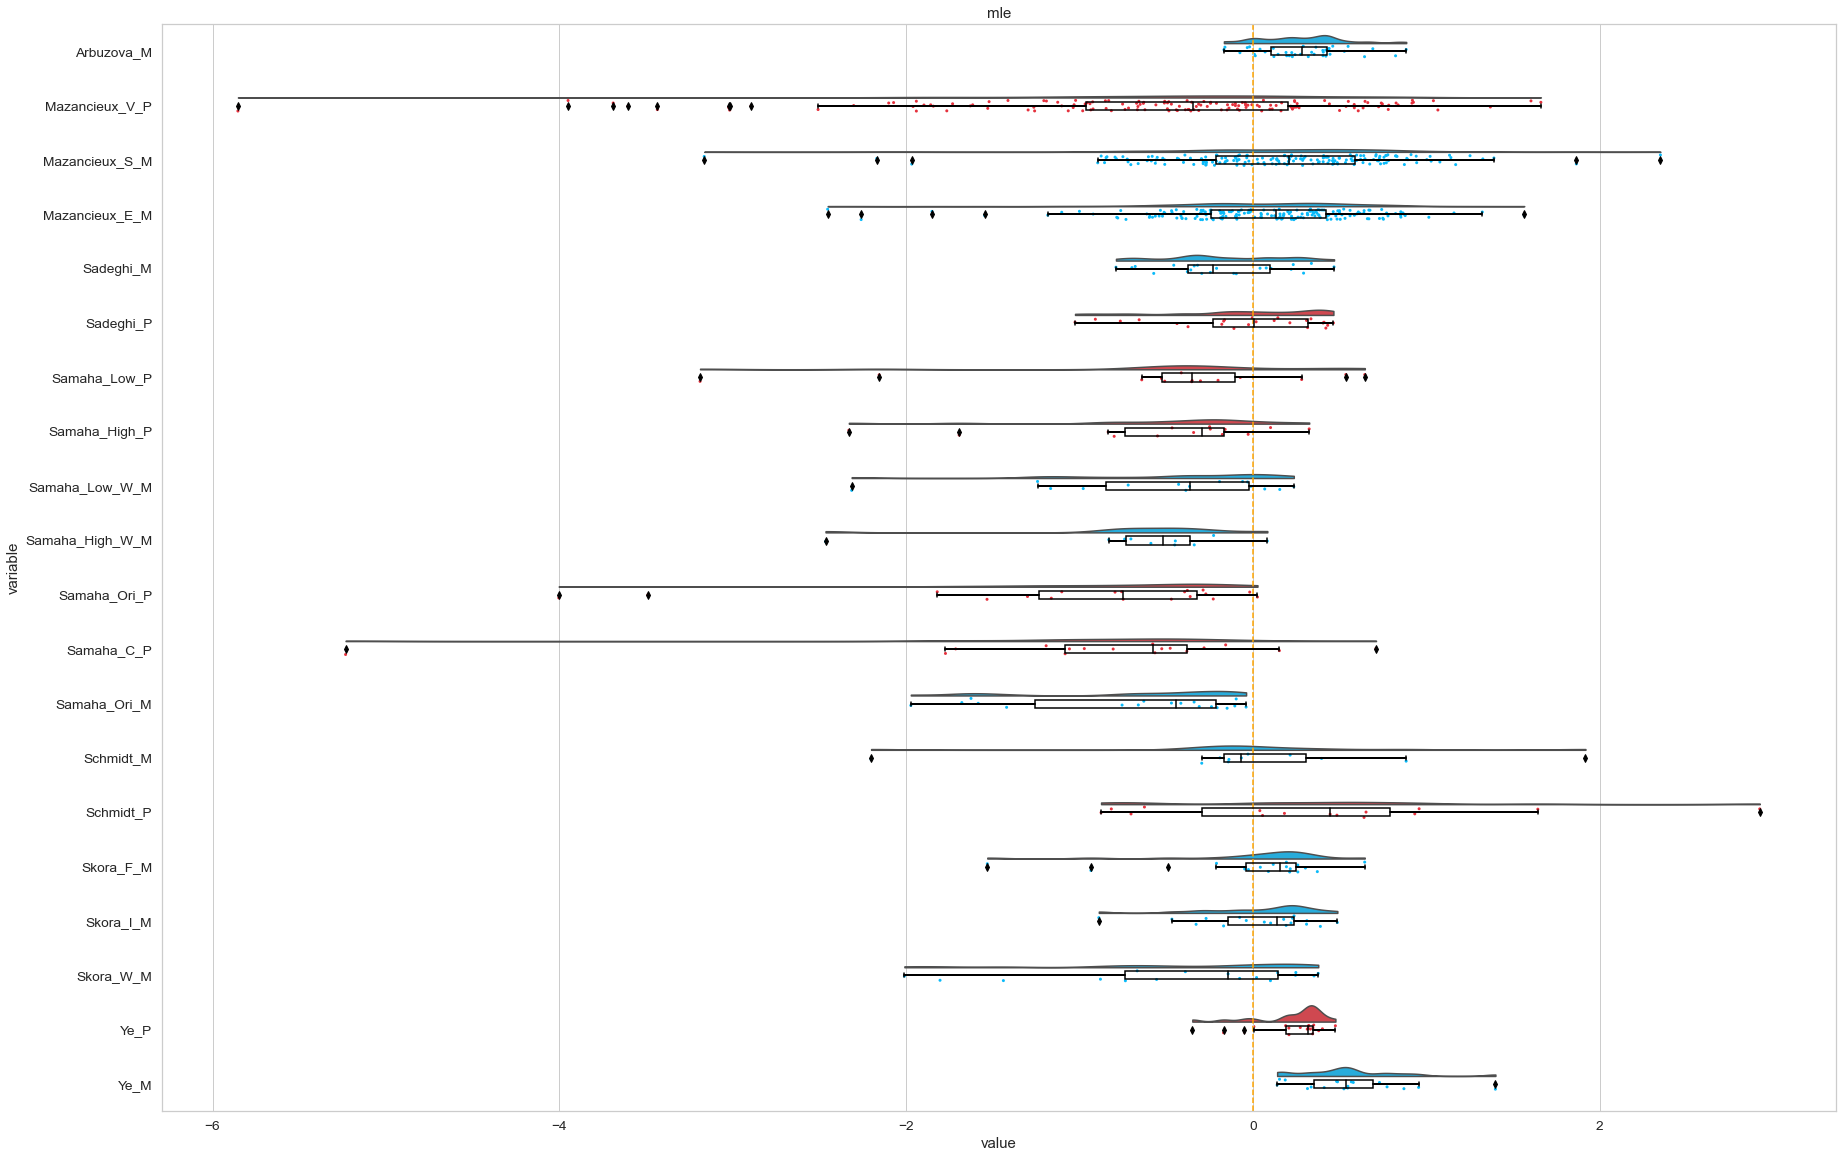

In [7]:
plotFullRaincloud(data=fullData)

### Singular raincloud plot

In [8]:
sns.set(style="whitegrid", font_scale=1.25)
def plotOneRaincloud(dataName, domains):
    """
    Create raincloud plots with input = string & domains
    """
    
    domains = [domain + '_mratio' for domain in domains]
    data = pd.read_csv('../../exports/metrics_' + dataName + '.csv', usecols=domains)
    data = pd.melt(data)
    
    # create raincloud plot
    
    f, ax = plt.subplots(figsize=(14, 10))
    
    ax = pt.half_violinplot(x='value', y='variable', data=data, palette="Set2",
                           bw=0.2, cut=0, scale='area', width=0.6, inner=None, orient='h')
    ax = sns.stripplot(x='value', y='variable', data=data, palette='Set2', edgecolor='blue', size=3, jitter=1,
                      zorder=0, orient='h')
    ax = sns.boxplot(x='value', y='variable', data=data, color='black', width=.15, zorder=10, showcaps=True,
                     boxprops={'facecolor': 'none', 'zorder': 10}, showfliers=True,
                     whiskerprops={'linewidth': 2, 'zorder': 10}, saturation=1, orient='h')

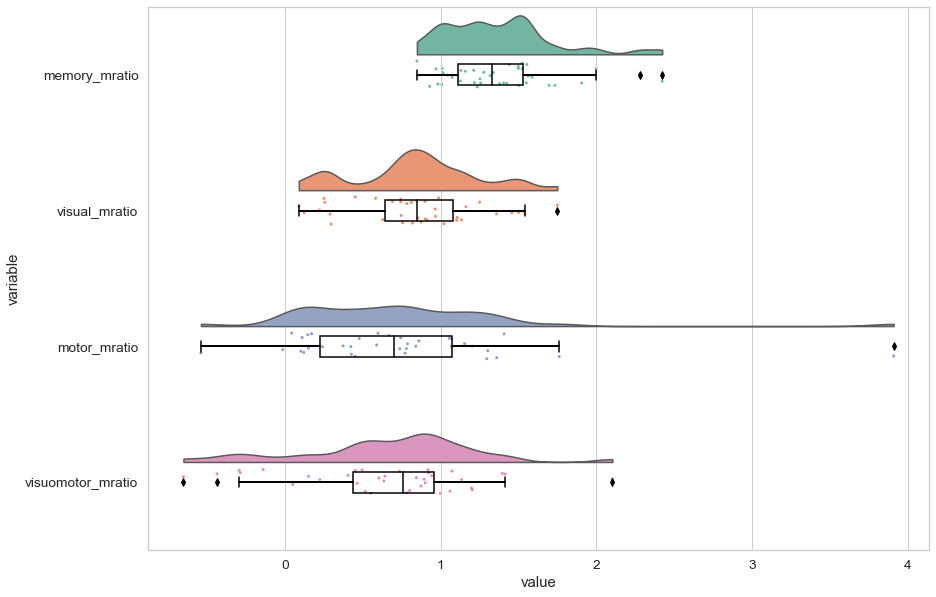

In [9]:
plotOneRaincloud(dataName='Arbuzova_unpub_3', domains=['memory', 'visual', 'motor', 'visuomotor'])